# TensorFlow Assignment: Multilayer Perceptron (MLP) Optimizer Sandbox

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Rohith Kuditipudi

## Multilayer Perceptron (MLP)

### Imports and helper functions

Let's play around with some optimizers. First some imports and helper functions:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# Helper functions for creating weight variables
def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Models

And here's the forward pass of the computation graph definition of the completed TensorFlow MLP assignment:

In [3]:
# Model Inputs
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# Define the graph
# First fully connected layer
W_fc1 = weight_variable([784, 500])
b_fc1 = bias_variable([500])
# h_fc1 = tf.nn.sigmoid(tf.matmul(x, W_fc1) + b_fc1)
h_fc1 = tf.nn.relu(tf.matmul(x, W_fc1) + b_fc1)

# Second fully connected layer
W_fc2 = weight_variable([500, 10])
b_fc2 = bias_variable([10])
y_mlp = tf.matmul(h_fc1, W_fc2) + b_fc2

# Loss 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_mlp))

# Evaluation
correct_prediction = tf.equal(tf.argmax(y_mlp, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizers

Instead of the optimizer being given though, let's try out a few. Here we have optimizers implementing algorithms for [Stochastic Gradient Descent](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) (SGD), [Stochastic Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer) (momentum), and [Adaptive Moments](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) (ADAM). Try out different parameter settings (e.g. learning rate) for each of them.

In [8]:
# Optimizers: Try out a few different parameters for SGD and SGD momentum
train_step_SGD = tf.train.GradientDescentOptimizer(learning_rate=.005).minimize(cross_entropy)
train_step_momentum = tf.train.MomentumOptimizer(learning_rate=.005, momentum=1.5).minimize(cross_entropy)
train_step_ADAM = tf.train.AdamOptimizer().minimize(cross_entropy)

# Op for initializing all variables
initialize_all = tf.global_variables_initializer()

### Training

Because we'll be repeating training a few times, let's move our training regimen into function. Note that we pass which optimization algorithm we're running as an argument. In addition to printing out the validation accuracy and final test accuracy, we'll also return the lists of accuracies at each validation step and the training losses at each iteration.

In [9]:
def train_MLP(train_step_optimizer, iterations=4000):
    with tf.Session() as sess:
        # Initialize (or reset) all variables
        sess.run(initialize_all)
        
        # Initialize arrays to track losses and validation accuracies
        valid_accs = [] 
        losses = []
        
        for i in range(iterations):
            # Validate every 250th batch
            if i % 250 == 0:
                validation_accuracy = 0
                for v in range(10):
                    batch = mnist.validation.next_batch(50)
                    validation_accuracy += (1/10) * accuracy.eval(feed_dict={x: batch[0], y_: batch[1]})
                print('step %d, validation accuracy %g' % (i, validation_accuracy))
                valid_accs.append(validation_accuracy)
                
            # Train    
            batch = mnist.train.next_batch(50)
            loss, _ = sess.run([cross_entropy, train_step_optimizer], feed_dict={x: batch[0], y_: batch[1]})
            losses.append(loss)
            
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
        
    return valid_accs, losses

Finally, let's train the MLP using all three optimizers and compare the results:

In [10]:
print("SGD:")
valid_accs_SGD, losses_SGD = train_MLP(train_step_SGD)
print("Momentum:")
valid_accs_momentum, losses_momentum = train_MLP(train_step_momentum)
print("ADAM:")
valid_accs_ADAM, losses_ADAM = train_MLP(train_step_ADAM)

SGD:
step 0, validation accuracy 0.112
step 250, validation accuracy 0.77
step 500, validation accuracy 0.828
step 750, validation accuracy 0.868
step 1000, validation accuracy 0.872
step 1250, validation accuracy 0.91
step 1500, validation accuracy 0.88
step 1750, validation accuracy 0.888
step 2000, validation accuracy 0.894
step 2250, validation accuracy 0.9
step 2500, validation accuracy 0.926
step 2750, validation accuracy 0.896
step 3000, validation accuracy 0.888
step 3250, validation accuracy 0.914
step 3500, validation accuracy 0.908
step 3750, validation accuracy 0.918
test accuracy 0.9146
Momentum:
step 0, validation accuracy 0.076
step 250, validation accuracy 0.106
step 500, validation accuracy 0.078
step 750, validation accuracy 0.09
step 1000, validation accuracy 0.086
step 1250, validation accuracy 0.124
step 1500, validation accuracy 0.076
step 1750, validation accuracy 0.1
step 2000, validation accuracy 0.086
step 2250, validation accuracy 0.104
step 2500, validation 

### Visualization

Plotting things:

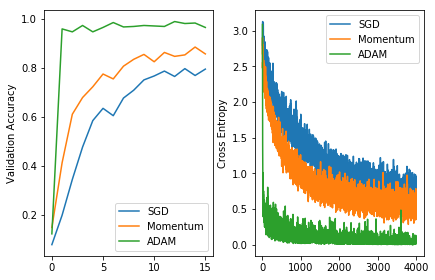

In [7]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

ax[0].plot(valid_accs_SGD)
ax[0].plot(valid_accs_momentum)
ax[0].plot(valid_accs_ADAM)

ax[0].set_ylabel('Validation Accuracy')
ax[0].legend(['SGD', 'Momentum', 'ADAM'], loc='lower right')

ax[1].plot(losses_SGD)
ax[1].plot(losses_momentum)
ax[1].plot(losses_ADAM)

ax[1].set_ylabel('Cross Entropy')
ax[1].legend(['SGD', 'Momentum', 'ADAM'], loc='upper right')
# ax[1].set_ylim([0,1.5])  # <- Use this to change y-axis limits

### Short Answer

How do SGD, SGD with momentum, and ADAM compare in performance? Ease of tuning parameters?

***

I think MNIST is an easy enough task that results are pretty robust to small changes in hyperparameters. I initially tried a learning rate of 0.05 for SGD and SGD with momentum (momentum=0.9) and used the default settings for ADAM, and immediately I was able to achieve results that were as good as can be expected using an MLP.

After experimenting a little more, I was successfully able to "break" SGD with momentum by using a high learning rate (i.e. >1) combined with a high momentum setting (i.e. >0.9). However, one thing that surprised me a little was that when I tried a learning rate >1 for vanilla SGD, my results actually didn't suffer a lot (still achieved >0.95 accuracy). I had to crank the learning rate up even higher to >2 in order to "break" vanilla SGD (to be fair I just immediately doubled the learning rate from when it was >1, so maybe SGD breaks even for learning rates < 2).

My takeaway is that high learning rates lead to a lot of variance in performance, and so when you combine an obscenely high learning rate with high momentum, there's a good chance you'll end up getting thrown off course and being unable to correct. On the other hand, momentum does help dramatically speed up convergence for low learning rates (i.e. SGD with momentum=0.9 and learning rate=0.0005 converged a lot faster than vanilla SGD with the same learning rate). I tried various momentum settings while keeping the learning rate at 0.0005, and found that the best performance/convergence rate was achieved with momentum close to 1.

The last thing I tried was momentum > 1. As expected, this led to awful performance (even for normal/small learning rates), since using a momentum > 1 not only means that your learning rate is basically compounding overtime, but also that your gradient estimate after a few learning steps is almost certainly way off the mark.

***

## Convolutional Neural Network (CNN): *Optional*

Adapt the MLP code above to train a CNN instead (*Hint: you can adapt the code from the 01D_MLP_CNN_Assignment_Solutions.ipynb for the CNN just like I did for the MLP*), and again compare the optimizers. The more complex nature of the CNN parameter space means that the differences between optimizers should be much more significant.